# Image Classification using Keras on teh MNIST database
I will be showing my experimenation woth Keras usgn Tensorflow backend

## Importing Secton

In [52]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [53]:
np.random.seed(1671)   # for reproducibility

##  Network and Training Parameter

In [54]:
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10  # number of outputs = number of digits
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2  # how much TRAIN is reserved for VALIDATION

## Loading and Assigning data

Default size of the images: (60000, 28, 28)
Variable   Type       Data/Info
-------------------------------
X_test     ndarray    10000x28x28: 7840000 elems, type `uint8`, 7840000 bytes (7.476806640625 Mb)
X_train    ndarray    60000x28x28: 47040000 elems, type `uint8`, 47040000 bytes (44.86083984375 Mb)
Y_test     ndarray    10000x10: 100000 elems, type `float64`, 800000 bytes (781.25 kb)
Y_train    ndarray    60000x10: 600000 elems, type `float64`, 4800000 bytes (4.57763671875 Mb)
y_test     ndarray    10000: 10000 elems, type `uint8`, 10000 bytes
y_train    ndarray    60000: 60000 elems, type `uint8`, 60000 bytes


The training image represent an number:  1 




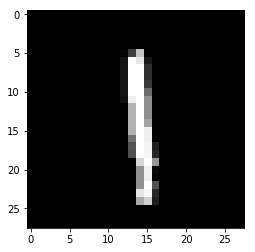

In [55]:
#data: Shuffled and plit between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Default size of the images:', X_train.shape)
# Provide information about the ndarray variables in this case X_train, y_train,X_test, and y_test
%whos ndarray
# Plot a random image from the training set
RandomIndex = np.random.randint(0,(X_train.shape)[1])

print('\n\nThe training image represent an number: ',y_train[RandomIndex],'\n\n')
plt.imshow(X_train[RandomIndex],cmap='gray')

In [56]:
#X_train is 6000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000,RESHAPED)
X_test = X_test.reshape(10000,RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
%whos ndarray

Variable   Type       Data/Info
-------------------------------
X_test     ndarray    10000x784: 7840000 elems, type `float32`, 31360000 bytes (29.9072265625 Mb)
X_train    ndarray    60000x784: 47040000 elems, type `float32`, 188160000 bytes (179.443359375 Mb)
Y_test     ndarray    10000x10: 100000 elems, type `float64`, 800000 bytes (781.25 kb)
Y_train    ndarray    60000x10: 600000 elems, type `float64`, 4800000 bytes (4.57763671875 Mb)
y_test     ndarray    10000: 10000 elems, type `uint8`, 10000 bytes
y_train    ndarray    60000: 60000 elems, type `uint8`, 60000 bytes


In [57]:
# normalize
#
X_train /= 255
X_test /= 255

In [58]:
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train,NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


## Design of the Model

In [59]:
# 10 outputs
#final statge is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Compilation of the Model

In [60]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=1, 
                    validation_split = VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 2s 44us/step - loss: 1.4686 - acc: 0.6496 - val_loss: 0.7240 - val_acc: 0.8471
Epoch 2/200
48000/48000 [==============================] - 2s 34us/step - loss: 0.5820 - acc: 0.8562 - val_loss: 0.4466 - val_acc: 0.8831
Epoch 3/200
48000/48000 [==============================] - 2s 33us/step - loss: 0.4356 - acc: 0.8817 - val_loss: 0.3729 - val_acc: 0.8991
Epoch 4/200
48000/48000 [==============================] - 2s 34us/step - loss: 0.3798 - acc: 0.8938 - val_loss: 0.3368 - val_acc: 0.9071
Epoch 5/200
48000/48000 [==============================] - 2s 35us/step - loss: 0.3479 - acc: 0.9006 - val_loss: 0.3131 - val_acc: 0.9125
Epoch 6/200
48000/48000 [==============================] - 2s 33us/step - loss: 0.3254 - acc: 0.9066 - val_loss: 0.2964 - val_acc: 0.9183
Epoch 7/200
48000/48000 [==============================] - 2s 35us/step - loss: 0.3080 - acc: 0.9116 - val_loss: 0.2823 - 

## Evaluation of the Model

In [61]:
score = model.evaluate(X_test,Y_test, verbose = VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 33us/step
Test score: 0.0841333707327
Test accuracy: 0.9773
